In [1]:
%run "..\data_cleaning\data_preprocessing.ipynb"

# Dataset import

In [2]:
df = fetch_and_merge()

In [ ]:
f1_2022_df = fetch_data_from_source('f1sim-data-2022.parquet')
f1_2022_df.sort_values(by=["SESSION_IDENTIFIER", "FRAME"], inplace=True)
f1_2022_df.reset_index(drop=True, inplace=True)
sector1_22 = f1_2022_df[f1_2022_df["SECTOR"]==0]

In [ ]:
f1_2023_df = fetch_data_from_source('f1sim-data-2023.parquet')
f1_2023_df.sort_values(by=["SESSION_IDENTIFIER", "FRAME"], inplace=True)
f1_2023_df.reset_index(drop=True, inplace=True)
sector1_23 = f1_2023_df[f1_2023_df["SECTOR"]==0]

In [4]:
turns_df = fetch_data_csv('f1sim-ref-turns.csv')
left_df = fetch_data_csv('f1sim-ref-left.csv')
right_df = fetch_data_csv('f1sim-ref-right.csv')
line_df = fetch_data_csv('f1sim-ref-line.csv')

In [ ]:
df.columns

In [ ]:
plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"], c = df["THROTTLE"], cmap = 'viridis')

In [ ]:
plt.hist(df["THROTTLE"])

In [ ]:
plt.hist(df["BRAKE"])

In [ ]:
plt.hist(df["GEAR"])

In [ ]:
plt.hist(df["ENGINE_RPM"])

In [ ]:
plt.hist(df["ROLL"])

# Pitch, Yaw and Roll

In [ ]:
df[np.isclose(df["YAW"], 1)]["YAW"]


In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = turn_1_df['WORLDPOSX']
Y = turn_1_df['WORLDPOSY']
Z = turn_1_df['YAW']
ax.scatter(X,Y,Z, c='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

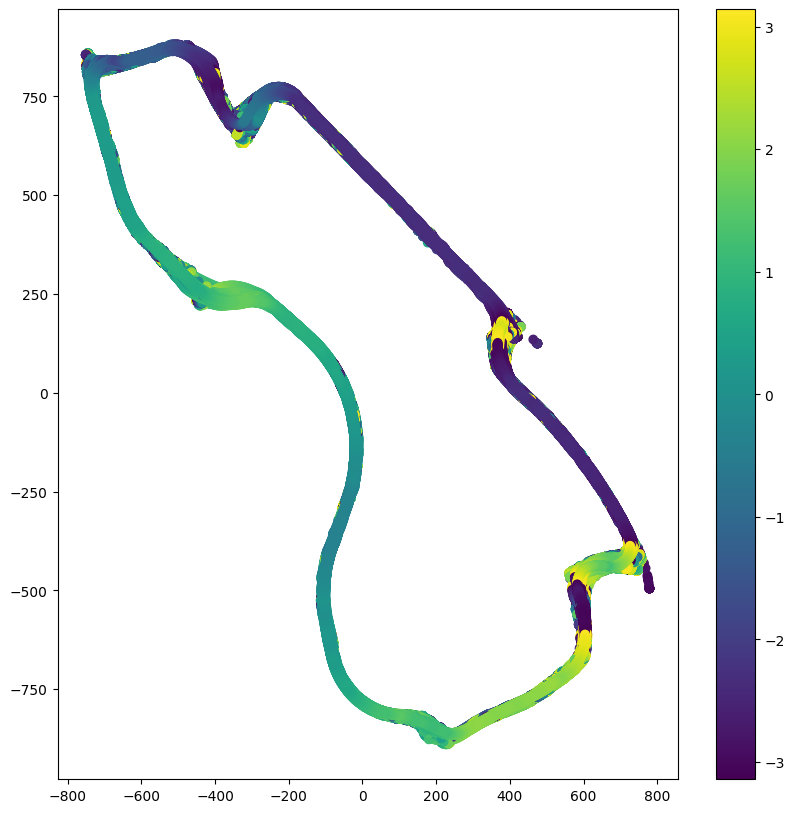

In [3]:
fig = plt.figure(figsize = (10, 10))
X = df['WORLDPOSX']
Y = df['WORLDPOSY']
Z = df['YAW']
plt.scatter(X,Y,c=Z, cmap='viridis', alpha=1)
plt.colorbar()
plt.show

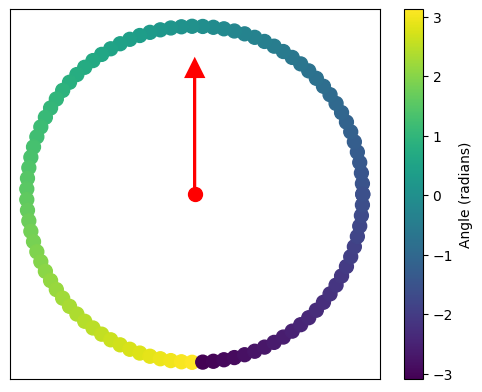

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points to create
num_points = 100

# Radius of the circle
radius = 1.0

# Create a list of angles evenly spaced around the circle
angles = np.linspace(0, 2 * np.pi, num_points)

# Calculate the x and y coordinates of the points
x = radius * np.cos(angles)
y = radius * np.sin(angles)

# Calculate the angle (in radians)
angle = np.arctan2(-x, y)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the circle of points and color them based on the angle
scatter = ax.scatter(x, y, c=angle, cmap='viridis', marker='o', s=100)

# Set aspect ratio to be equal so the circle looks like a circle
ax.set_aspect('equal')


# Create a colorbar to show the angle-color mapping
cbar = plt.colorbar(scatter)
cbar.set_label('Angle (radians)')

plt.scatter(0,0,c='red', s = 100)

ax.arrow(0, 0, 0, 0.7, head_width=0.1, head_length=0.1, linewidth=2, fc='red', ec='red')

ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [ ]:
plt.scatter(f1_2022_df['PITCH'], f1_2022_df['ROLL'])

In [ ]:
plt.scatter(f1_2023_df['PITCH'], f1_2023_df['ROLL'])

In [ ]:
plt.scatter(f1_2023_df['PITCH'], f1_2023_df['YAW'])

In [ ]:
plt.scatter(f1_2023_df['ROLL'], f1_2023_df['YAW'])

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2022_df['PITCH']
Y = f1_2022_df['ROLL']
Z = f1_2022_df['YAW']
ax.scatter(X,Y,Z, c='blue', alpha=0.1)
plt.show

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2023_df['PITCH']
Y = f1_2023_df['ROLL']
Z = f1_2023_df['YAW']
ax.scatter(X,Y,Z, c='blue', alpha=0.1)
plt.show

# Lap Distance

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2023_df["WORLDPOSX"]
Y = f1_2023_df["WORLDPOSY"]
Z = f1_2023_df["LAP_DISTANCE"]
ax.scatter(X,Y,Z, c='blue', s=1)
plt.show

# World Direction

In [ ]:
spin = f1_2023_df[f1_2023_df["GEAR"]==-1]
no_spin = f1_2023_df[f1_2023_df["GEAR"]!=-1]
plt.scatter(no_spin["STEERING"],no_spin["BRAKE"], c='blue', alpha = 0.01)
# plt.scatter(spin["STEERING"],spin["BRAKE"], c='red', alpha = 0.1)

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2023_df["WORLDFORWARDDIRX"]
Y = f1_2023_df["WORLDFORWARDDIRY"]
Z = f1_2023_df["WORLDFORWARDDIRZ"]
ax.scatter(X,Y,Z, c='blue', alpha = 0.1, s=1)
plt.show

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2023_df["WORLDRIGHTDIRX"]
Y = f1_2023_df["WORLDRIGHTDIRY"]
Z = f1_2023_df["WORLDRIGHTDIRZ"]
ax.scatter(X,Y,Z, c='blue', alpha = 0.1, s=1)
plt.show

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2023_df["WORLDPOSX"]
Y = f1_2023_df["WORLDPOSY"]
Z = f1_2023_df["YAW"]
ax.scatter(X,Y,Z, c='blue', alpha = 0.1, s=1)
plt.show

# Exploring forward direction

In [ ]:
s=sector1_22[0:1]
x=[s["WORLDPOSX"], s["WORLDFORWARDDIRX"]]
y=[s["WORLDPOSY"], s["WORLDFORWARDDIRY"]]
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"], c='green', s=1)
plt.scatter(s["WORLDPOSX"], s["WORLDPOSY"], c='red')
plt.plot (x,y)
plt.scatter(s["WORLDFORWARDDIRX"], s["WORLDFORWARDDIRY"])
plt.xlim(100, 200)
plt.ylim(400, 500)
plt.grid(True)
plt.show()

In [ ]:
y = sector1_22[sector1_22["GEAR"]==-1]
y[(y["WORLDPOSX"]>430) & (y["WORLDPOSX"]<500)]

In [ ]:
y["SESSION_IDENTIFIER"][646998]

In [ ]:
y.columns

In [ ]:
z=y[y["SESSION_IDENTIFIER"]==1.5988171178494409e+19]

In [ ]:
z

In [ ]:
plt.scatter(z["WORLDPOSX"], z["WORLDPOSY"], alpha=0.1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"], c='red', s=1)
plt.xlim(200, 600)
plt.ylim(-50, 350)
plt.grid(True)
plt.show()

In [ ]:
plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"], alpha=0.1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"], c='red', s=1)
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], c='red', s=1)
plt.xlim(200, 600)
plt.ylim(-50, 350)
plt.grid(True)
plt.show()

In [ ]:
plt.scatter(sector1_23["WORLDPOSX"], sector1_23["WORLDPOSY"], alpha=0.1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"], c='red', s=1)
plt.xlim(200, 600)
plt.ylim(-50, 350)
plt.grid(True)
plt.show()

In [ ]:
tmp = sector1_23[sector1_23["SESSION_IDENTIFIER"]==9.71858316376882e+16]
tmp[tmp["LAP_NUM"]==1]["SECTOR_1_TIME_MS"].unique()

# since the output is a single number, this tells us that the sector times are the same for each lap,
# not specific to the frame itself

# Exploring Gears

In [ ]:
for x in range(-1, 9):
    s0 = f1_2022_df[f1_2022_df["GEAR"]==x].groupby("SECTOR").count()['FRAME'][0]
    s1 = f1_2022_df[f1_2022_df["GEAR"]==x].groupby("SECTOR").count()['FRAME'][1]
    s2 = f1_2022_df[f1_2022_df["GEAR"]==x].groupby("SECTOR").count()['FRAME'][2]
    print("gear "+str(x)+" was used in sector 0: "+str(s0)+", sector 1: "+str(s1)+", sector 2: "+str(s2))